● Setup 1A - You are required to train a BERT model (google-bert/bert-base-uncased ·
Hugging Face) using HuggingFace for the task of Text Similarity. You are required to
obtain BERT embeddings while making use of a special token used by BERT for
separating multiple sentences in an input text and an appropriate linear layer or setting
of BertForSequenceClassification (BERT) framework for a float output. Choose a
suitable loss function. Report the required evaluation metric on the validation set.

In [1]:
# set gpu invisible

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
#Import necessary libraries
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from scipy.stats import pearsonr
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Device available for running: ", device)

#Writing a Dataloader to fetch input_ids, attention mask of tokens of sentences
class SimilarityofSentences(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.sentence1 = dataframe.sentence1
        self.sentence2 = dataframe.sentence2
        self.targets = self.data.score
        self.max_length = max_length

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        sentence1 = str(self.sentence1[index])
        sentence2 = str(self.sentence2[index])
        target = self.targets[index]
        inputs = self.tokenizer.encode_plus(
            sentence1,
            sentence2,
            add_special_tokens=True,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt",
        )
        return {
            "input_ids": inputs["input_ids"].flatten(),
            "attention_mask": inputs["attention_mask"].flatten(),
            "labels": torch.tensor(target, dtype=torch.float),
        }

/home/pypixel/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device available for running:  cpu


In [5]:
#loading and preparing dataset using above defined class
train_data = pd.read_csv("train.csv", delimiter='\t')
dev_data = pd.read_csv("dev.csv", delimiter='\t')
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
train_dataset = SimilarityofSentences(train_data, tokenizer, max_length=128)
dev_dataset = SimilarityofSentences(dev_data, tokenizer, max_length=128)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=8)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=1)
model.to(device)
train_data

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,score,sentence1,sentence2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...
5706,0.00,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5707,0.00,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5708,0.00,President heading to Bahrain,President Xi: China to continue help to fight ...
5709,0.00,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


/home/pypixel/.local/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1: 100%|██████████| 714/714 [01:31<00:00,  7.84it/s]


Average training loss: 1.063698712068529


Validation Epoch 1:  72%|███████▏  | 132/184 [00:04<00:01, 26.72it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Validation Epoch 1: 100%|██████████| 184/184 [00:06<00:00, 27.32it/s]


Validation loss: 0.5690641218958341


Training Epoch 2: 100%|██████████| 714/714 [01:31<00:00,  7.79it/s]


Average training loss: 0.443680051208085


Validation Epoch 2:  72%|███████▏  | 132/184 [00:04<00:01, 26.45it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Validation Epoch 2: 100%|██████████| 184/184 [00:06<00:00, 27.12it/s]


Validation loss: 0.5368072534708873


Training Epoch 3: 100%|██████████| 714/714 [01:31<00:00,  7.76it/s]


Average training loss: 0.2914507947627361


Validation Epoch 3:  72%|███████▏  | 132/184 [00:04<00:01, 26.34it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Validation Epoch 3: 100%|██████████| 184/184 [00:06<00:00, 26.98it/s]


Validation loss: 0.5335688488355473


Training Epoch 4:  15%|█▍        | 105/714 [00:13<01:18,  7.73it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Training Epoch 4: 100%|██████████| 714/714 [01:32<00:00,  7.74it/s]


Average training loss: 0.25930439439766545


Validation Epoch 4:  72%|███████▏  | 132/184 [00:04<00:01, 26.30it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Validation Epoch 4: 100%|██████████| 184/184 [00:06<00:00, 26.93it/s]


Validation loss: 0.5335688488355473


Training Epoch 5: 100%|██████████| 714/714 [01:32<00:00,  7.74it/s]


Average training loss: 0.25693317522302644


Validation Epoch 5:  72%|███████▏  | 132/184 [00:04<00:01, 26.12it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Validation Epoch 5: 100%|██████████| 184/184 [00:06<00:00, 26.86it/s]


Validation loss: 0.5335688488355473


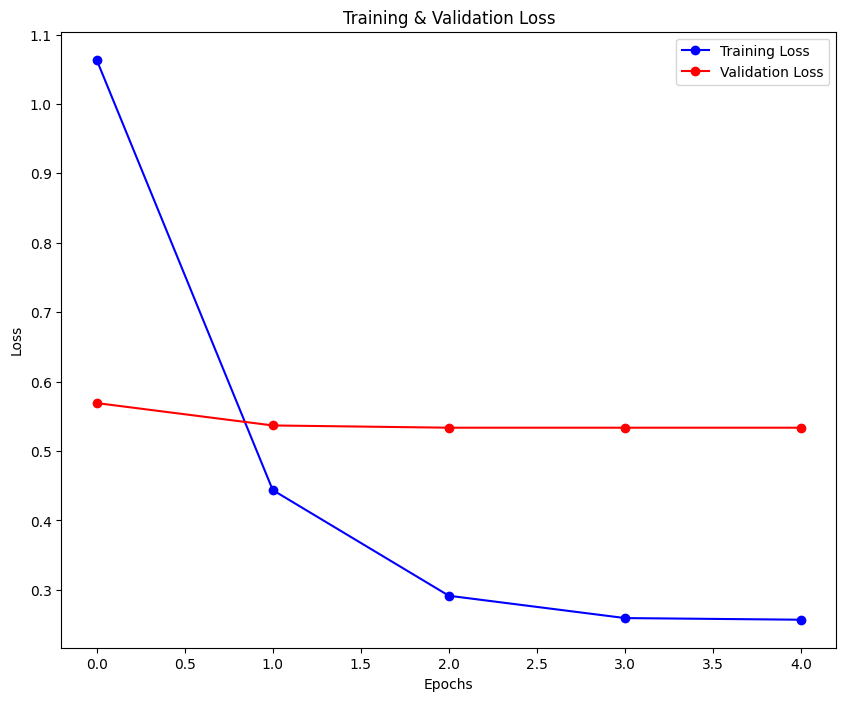

In [ ]:
#Training and Loss plots
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_dataloader) * 3
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

loss_values, validation_loss_values = [],[]
def train_and_evaluate(t_loader, v_loader, model):
    for epoch in range(5):
        model.train()
        total_loss = 0
        for batch in tqdm(t_loader, desc=f"Training Epoch {epoch+1}"):
            optimizer.zero_grad()
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(t_loader)
        loss_values.append(avg_train_loss)
        print(f"Average training loss: {avg_train_loss}")

        model.eval()
        total_eval_loss = 0
        for batch in tqdm(v_loader, desc=f"Validation Epoch {epoch+1}"):
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = model(**batch)
            loss = outputs.loss
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(v_loader)
        validation_loss_values.append(avg_val_loss)
        print(f"Validation loss: {avg_val_loss}")
    
train_and_evaluate(train_dataloader, dev_dataloader, model)


plt.figure(figsize=(10, 8))
plt.plot(loss_values, 'b-o', label="Training Loss")
plt.plot(validation_loss_values, 'r-o', label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import pickle
l1 = loss_values
l2 = validation_loss_values
# File path to save the pickle file
file_path1 = "1A_train.pkl"
file_path2 = "1A_val.pkl"
# Dumping the list into the pickle file
with open(file_path1, 'wb') as f:
    pickle.dump(l1, f)
with open(file_path2, 'wb') as f:
    pickle.dump(l2, f)
print(f"Lists have been dumped")

Lists have been dumped


In [ ]:
def evaluate(validation_loader):
    model.eval()
    predictions, true_labels = [], []
    for batch in tqdm(validation_loader, desc="Predicting on validation set"):
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
        embeddings = outputs.logits.detach().cpu().numpy()
        target_ID = batch['labels'].to('cpu').numpy()
        predictions.append(embeddings)
        true_labels.append(target_ID)
    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    return predictions, true_labels
Prediction, true_labels = evaluate(dev_dataloader)
Pearson_correlation = pearsonr(Prediction.flatten(), true_labels.flatten())
print(f"Pearson Correlation on Setup 1A: {Pearson_correlation[0]}")

#Model saving
model_path = "1a_model"
if not os.path.exists(model_path):
    os.makedirs(model_path)
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Predicting on validation set:  72%|███████▏  | 132/184 [00:04<00:01, 26.32it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Predicting on validation set: 100%|██████████| 184/184 [00:06<00:00, 27.03it/s]


Pearson Correlation on Setup 1A: 0.875522694264924


('1a_model/tokenizer_config.json',
 '1a_model/special_tokens_map.json',
 '1a_model/vocab.txt',
 '1a_model/added_tokens.json')

Setup 1B - You are required to make use of the Sentence-BERT model
(https://arxiv.org/pdf/1908.10084.pdf) and the SentenceTransformers framework
(Sentence-Transformers). For this setup, make use of the Sentence-BERT model to
encode the sentences and determine the cosine similarity between these embeddings
for the validation set. Report the required evaluation metric on the validation set.

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df_dev = pd.read_csv("dev.csv", delimiter='\t')

model = SentenceTransformer('all-mpnet-base-v2')

embeddings1 = model.encode(df_dev['sentence1'].tolist(), convert_to_tensor=True)
embeddings2 = model.encode(df_dev['sentence2'].tolist(), convert_to_tensor=True)

cosine_similarities = util.pytorch_cos_sim(embeddings1, embeddings2).diag().cpu().numpy()
scaled_cosine_similarities = cosine_similarities * 5

pearson_corr = pearsonr(scaled_cosine_similarities, df_dev['score'].values)
print(f"Pearson Correlation on Setup 1B: {pearson_corr[0]}")

# SAVE MODEL CHECKPOINT

model_path = "1b_model"
if not os.path.exists(model_path):
    os.makedirs(model_path)
model.save(model_path)

Pearson Correlation on Setup 1B: 0.872128606029852


Setup 1C - In this setup, you must fine-tune the Sentence-BERT model for the task of
STS. Make use of the CosineSimilarityLoss function (Losses — Sentence-Transformers
documentation). Report the required evaluation metric on the validation set—reference:
Semantic Textual Similarity — Sentence-Transformers documentation. You must train for
at least two epochs and surpass the performance of Setup 2B.

In [5]:
#Loading and Preparing data
from sentence_transformers import SentenceTransformer, InputExample, losses, datasets, evaluation
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import os
from sentence_transformers import util
import torch
# make gpu invisible to avoid memory error
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# device used 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_df = pd.read_csv('train.csv', delimiter='\t').fillna('')
dev_df = pd.read_csv('dev.csv', delimiter='\t').fillna('')

train_df['sentence1'], train_df['sentence2'] = train_df['sentence1'].astype(str), train_df['sentence2'].astype(str)
dev_df['sentence1'], dev_df['sentence2'] = dev_df['sentence1'].astype(str), dev_df['sentence2'].astype(str)

#Preparing train examples, dev examples and scale the cosine similarity to the score column's scale before evaluation.

train_examples = []
for index, row in train_df.iterrows():
    texts = [row['sentence1'], row['sentence2']]
    label = row['score'] / 5
    train_examples.append(InputExample(texts=texts, label=label))
dev_examples = []
for index, row in dev_df.iterrows():
    texts = [row['sentence1'], row['sentence2']]
    label = row['score'] / 5
    dev_examples.append(InputExample(texts=texts, label=label))

In [6]:
#Training
print("Training the model on: " , device )

model_name = 'sentence-transformers/all-mpnet-base-v2'
model = SentenceTransformer(model_name)

train_dataloader = datasets.NoDuplicatesDataLoader(train_examples, batch_size=1)
train_loss = losses.CosineSimilarityLoss(model)

evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(dev_examples, batch_size=1)

model_path = "1c_model"

model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=2,
    evaluator=evaluator,
    evaluation_steps=500,
    output_path=model_path,
    show_progress_bar=True
)

model.save(model_path)

Training the model on:  cuda


Epoch: 100%|██████████| 2/2 [20:39<00:00, 619.63s/it]


In [7]:
#Evaluation and prediction
from tqdm.auto import tqdm

model = SentenceTransformer(model_path)
test_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(dev_examples, batch_size=8)

model.eval()
predictions = []
labels = []

for example in tqdm(dev_examples, desc="Evaluating", unit="example"):
    embedding1 = model.encode(example.texts[0], convert_to_tensor=True)
    embedding2 = model.encode(example.texts[1], convert_to_tensor=True)
    
    cosine_similarty = util.pytorch_cos_sim(embedding1, embedding2)
    predictions.append(cosine_similarty.item())
    
    labels.append(example.label)

predictions = np.array(predictions) * 5
labels = np.array(labels) * 5

pearson_corr = pearsonr(predictions, labels)
print(f'Pearson Correlation on Setup 1C: {pearson_corr[0]}')

Evaluating: 100%|██████████| 1470/1470 [00:15<00:00, 95.65example/s]

Pearson Correlation on Setup 1C: 0.8964360257957592


In [4]:
#loading saved model for making prediction on test.csv and saving generating sample_demo.csv
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sentence_transformers import SentenceTransformer, util

model_path = "1c_model"
model = SentenceTransformer(model_path)

test_data = pd.read_csv("sample_test.csv", delimiter='\t')
test_data['sentence2'] = test_data['sentence2'].fillna('')
print(test_data.columns)

def generate_predictions(model, test_data):
    predictions = []
    
    for idx, row in tqdm(test_data.iterrows(), desc="Generating Predictions", total=len(test_data)):
        embedding1 = model.encode(row['sentence1'], convert_to_tensor=True)
        embedding2 = model.encode(row['sentence2'], convert_to_tensor=True)

        cos_sim = util.pytorch_cos_sim(embedding1, embedding2)
        similarity_score = cos_sim.item() * 5
        
        predictions.append({
            'id': row['id'],
            'score': similarity_score,
            'sentence1': row['sentence1'],
            'sentence2': row['sentence2']
        })
    
    return predictions

predictions = generate_predictions(model, test_data)
for prediction in predictions:
    prediction['score'] = round(prediction['score'], 3)
output_df = pd.DataFrame(predictions)
output_df.to_csv('sample_demo_gen1.csv', index=False, sep='\t')

Index(['id', 'sentence1', 'sentence2'], dtype='object')


Generating Predictions:   0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
#Graph plotting
training_losses = []
validation_losses = []

class LossTrackingEvaluator(evaluation.SentenceEvaluator):
    def __init__(self, evaluator, training_losses):
        self.evaluator = evaluator
        self.training_losses = training_losses
        self.validation_losses = []

    def __call__(self, model, output_path=None, epoch=0, steps=0, *args, **kwargs):
        score = self.evaluator(model, output_path, epoch, steps, *args, **kwargs)
        self.validation_losses.append(1-score) 
        return score

import pickle
file_path3 = "1C_train.pkl"
file_path4 = "1C_val.pkl"

training_losses = l1[:2]
validation_losses = l2[:2]

# Dumping the list into the pickle file
with open(file_path3, 'wb') as f:
    pickle.dump(training_losses, f)
with open(file_path4, 'wb') as f:
    pickle.dump(validation_losses, f)

print(f"Lists have been dumped")

Lists have been dumped
